## The Factory Method

Define an interface which takes in creation parameters and creates the right object.

In [1]:
class Product:
    
    def __init__(self, name, prize):
        self.__name = name
        self.__prize = prize
    
    def get_prize(self):
        return self.__prize

In [2]:
class MacBookAir(Product):
   
    def __init__(self, memory, os):
        Product.__init__(self, 'MacBookAir', 1031)
        
        self.__memory = memory
        self.__os = os

class AppleIpad(Product):
    
    def __init__(self, generation):
        Product.__init__(self, 'AppleIpad', 529)
        
        self.__generation = generation

class AppleIwatch(Product):
    
    def __init__(self):
        super().__init__(self, 'AppleIwatch', 264)
    

In [3]:
class ProductFactory():
    
    @staticmethod
    def create(item_name, *args):
        if item_name == 'MacBookAir':
            return MacBookAir(*args)
        elif item_name == 'AppleIpad':
            return AppleIpad(*args)
        elif item_name == 'AppleIwatch':
            return AppleIwatch(*args)

In [7]:
air = ProductFactory.create('MacBookAir', '16Gb', 'Sierra')

air.__dict__

{'_Product__name': 'MacBookAir',
 '_Product__prize': 1031,
 '_MacBookAir__memory': '16Gb',
 '_MacBookAir__os': 'Sierra'}

In [8]:
ipad = ProductFactory.create('AppleIpad', '2nd')

ipad.__dict__

{'_Product__name': 'AppleIpad',
 '_Product__prize': 529,
 '_AppleIpad__generation': '2nd'}

## Refactoring code to improve design

#### Creating and usign the right serialization object

To serialize movie entities into different formas: JSON, XML, etc

>La serialización es el proceso de convertir un objeto en una secuencia de bytes para almacenarlo o transmitirlo a la memoria, a una base de datos o a un archivo. Su propósito principal es guardar el estado de un objeto para poder volver a crearlo cuando sea necesario. El proceso inverso se denomina deserialización.
Funcionamiento de la serialización
En esta ilustración se muestra el proceso general de la serialización:

>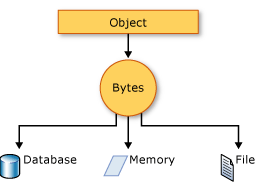

>El objeto se serializa en una secuencia que incluye los datos. La secuencia también puede tener información sobre el tipo del objeto, como la versión, la referencia cultural y el nombre del ensamblado. A partir de esa secuencia, el objeto se puede almacenar en una base de datos, en un archivo o en memoria.

En este caso JSON -> Dictionary , XML -> es una serie de tags con jerarquía

In [1]:
import json
import xml.etree.ElementTree as et

class Movie:
    def __init__(self, movie_id, name, director):
        
        self.movie_id = movie_id
        self.name = name
        self.director = director
        

In [3]:
class MovieSerializer:
    
    def serialize(self, movie, fmt): # Takes in the movie object that you want serialized out to disk and the format you want
        if fmt is 'JSON':
            movie_info = {
                'id': movie.movie_id,
                'name': movie.name,
                'director': movie.director
            }
            
            return json.dumps(movie_info)
        
        
        elif fmt is 'XML':
            movie_info = et.Element('movie', attrib={'id':movie.movie_id})
            
            name = et.SubElement(movie_info, 'name')
            name.text = movie.name
            
            director = et.SubElement(movie_info, 'director')
            director.text = movie.director
            
            return et.tostring(movie_info, encoding='unicode')
        
        else:
            raise ValueError(fmt)
        

**The serialization code has been basically put in a single method, SO KIND OF A JUMBLE(revoltijo)**

- If the format is json: we've set up all of the movie information in the form of a Python dictionary.
- If the format is xml: We'll first create a top level element called movie, which will have attributes. Once we set up the XML tree representing this movie, we convert to a string format and return that string to the invoker of the serialize function.
- For any other format we raise a ValueError

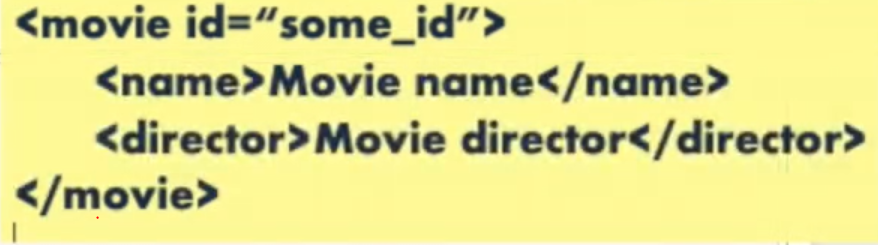

In [4]:
movie = Movie('578', 'Avengers: End Game', 'Russo brothers')

In [5]:
serializer =  MovieSerializer()

In [6]:
serializer.serialize(movie, 'JSON')

'{"id": "578", "name": "Avengers: End Game", "director": "Russo brothers"}'

The movie serailzed in the XML format. The id of the movie .... are XML nested tags within the top level movie tag.

In [7]:
serializer.serialize(movie, 'XML')

'<movie id="578"><name>Avengers: End Game</name><director>Russo brothers</director></movie>'

In [8]:
serializer.serialize(movie, 'YAML')

ValueError: YAML

#### Esta implementación puede tener mejoras...

Here it is the weakness of our implementation. Let's say that you were to add YAML serialization, you'll have to go in and modify the serialize function.

Separate the code into diferent helper functions: called_serialized_to_json

**Remeber: CLASSES ONCE WRITTEN HAVE TO BE CLOSED FOR MODIFICATION AND OPEN FOR EXTENTION**

Para introducir the yaml format, only introduce another function.

In [14]:
class MovieSerializer:
    
    def serialize(self, movie, fmt): 
        if fmt is 'JSON':
            return self._serialize_to_json(movie)
        
        
        elif fmt is 'XML':
            return self._serialize_to_xml(movie)
        
        else:
            raise ValueError(format)
        
    def _serialize_to_json(self, movie):
        movie_info = {
                'id': movie.movie_id,
                'name': movie.name,
                'director': movie.director
            }
        return json.dumps(movie_info)
    
    def _serialize_to_xml(self, movie):
        movie_element = et.Element('movie', attrib={'id':movie.movie_id})  
        
        name = et.SubElement(movie_element, 'name')
        name.text = movie.name
        director = et.SubElement(movie_element, 'director')
        director.text = movie.director
            
        return et.tostring(movie_element, encoding='unicode')
    
    
    
    

In [15]:
serializer = MovieSerializer()

In [16]:
serializer.serialize(movie, 'JSON')

'{"id": "578", "name": "Avengers: End Game", "director": "Russo brothers"}'

In [17]:
serializer.serialize(movie, 'XML')

'<movie id="578"><name>Avengers: End Game</name><director>Russo brothers</director></movie>'

## Applying the Factory Pattern

In [18]:
import movieserializer

In [19]:
movie = Movie('578', 'Avengers: End Game', 'Russo brothers')

In [20]:
movieserializer.MovieSerializer.serialize(movie, 'JSON')

'{"id": "578", "name": "Avengers: End Game", "director": "Russo brothers"}'

In [21]:
movieserializer.MovieSerializer.serialize(movie, 'XML')

'<movie id="578"><name>Avengers: End Game</name><director>Russo brothers</director></movie>'

In [22]:
movieserializer.MovieSerializer.serialize(movie, 'YAML')

ValueError: YAML